# Modeling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.sparse import csr_matrix

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier

# Resampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Feature selection
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

# Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
#from skopt import BayesSearchCV
#from skopt.space import Real, Categorical, Integer

# Evaluation
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report

# Deep Learning Model
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier

plt.style.use('seaborn')

## 1. Import Data

In [2]:
data = pd.read_csv('/Users/chenyiqiu/Desktop/Semester 2/BT5153/Final project/processing/python_data_v8.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190234 entries, 0 to 190233
Columns: 133 entries, Id to tag_class1_numbers
dtypes: float64(1), int64(120), object(12)
memory usage: 193.0+ MB


In [3]:
data.head()

,Id,Title,QuestionBody,AnswerBody,QuestionTime,AnswerTime,AnswerTimeDiff,Tags,UserId,UserReputation,...,python-asyncio,python-imaging-library,windows,tags_text,tag_numbers,Tag_Score,Weekday,tags_text_new,tag_class0_numbers,tag_class1_numbers
0,53992234,How to rearrange subplots so that one is under...,<p>I am trying to code two plots such that one...,"<p>The way the numbers work in <a href=""https:...",2019-01-01 00:05:48,2019-01-01 00:12:23,7,<python><matplotlib><subplot>,10783174,89,...,0,0,0,python matplotlib subplot,3,59238.33,1,matplotlib subplot,1,2
1,53992303,Python dominate package | add <style> to an html,<p>I'm trying to generate an html with the dom...,"<p>Is this what you are after? <a href=""https:...",2019-01-01 00:23:25,2019-01-01 04:38:00,255,<python><html><css><dominate>,9986139,211,...,0,0,0,python html css dominate,4,43295.50,1,html css dominate,1,3
2,53992436,How to assign without instantiating,<p>I need to remove a item from a list and the...,<p>Replace this line:</p>\n\n<pre><code>x=x2\n...,2019-01-01 01:08:26,2019-01-01 01:11:38,3,<python>,10659353,167,...,0,0,0,python,1,170927.00,1,NaN,0,0
3,53992494,Dataframe filter with multi-index: return all ...,<p>I'm looking for the syntax to return all fi...,<p>You can use <code>groupby</code> on level =...,2019-01-01 01:23:31,2019-01-01 02:40:14,77,<python><pandas><multi-index>,10853168,21,...,0,0,0,python pandas multi-index,3,70674.00,1,multi-index,1,1
4,53992552,"Python/Flask - suddenly getting ""ImportError: ...",<p>I'm running into what I believe is a fairly...,"<p>You should add <code>""my_app.lib""</code> to...",2019-01-01 01:42:03,2019-01-01 09:26:23,464,<python><python-3.x><flask>,5203069,5630,...,0,0,0,python python-3.x flask,3,68323.00,1,flask,1,1


In [4]:
seed = 2021

#### Split train and test set

In [5]:
X = data.drop(columns = ['Id','Title','QuestionBody','AnswerBody','QuestionTime','AnswerTime','tags_text','tags_text_new',
              'AnswerTimeDiff','Tags','UserId','waiting_time_range','clean_title','clean_question','clean_answer'])
y = data['waiting_time_range']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=seed)

In [7]:
X_train.head()

,UserReputation,UserPageViews,UserUpVote,UserDownVotes,BadgeNum,Title_Char_Length,Question_Char_Length,Title_word_counts,Question_word_counts,code_include,...,time-series,split,python-asyncio,python-imaging-library,windows,tag_numbers,Tag_Score,Weekday,tag_class0_numbers,tag_class1_numbers
60202,12358,1519,4163,81,82,56,752,7,133,1,...,0,0,0,0,0,2,87388.5,1,1,1
123149,126,14,3,0,2,47,1054,6,182,1,...,0,0,0,0,0,5,34844.8,1,2,4
44487,4033,392,388,611,23,54,930,8,179,1,...,0,0,0,0,0,5,8727.8,1,0,3
72032,506,147,36,6,9,79,325,10,45,0,...,0,0,0,0,0,3,57051.0,1,0,2
77905,2904,657,1500,6,9,53,672,8,135,1,...,0,0,0,0,0,3,24715.0,0,1,1


In [8]:
X_train.columns

Index(['UserReputation', 'UserPageViews', 'UserUpVote', 'UserDownVotes',
       'BadgeNum', 'Title_Char_Length', 'Question_Char_Length',
       'Title_word_counts', 'Question_word_counts', 'code_include',
       ...
       'time-series', 'split', 'python-asyncio', 'python-imaging-library',
       'windows', 'tag_numbers', 'Tag_Score', 'Weekday', 'tag_class0_numbers',
       'tag_class1_numbers'],
      dtype='object', length=118)

#### Scaling data

In [85]:
scale_feature = ['UserReputation','UserPageViews', 'UserUpVote', 'UserDownVotes',
                 'BadgeNum', 'Title_Char_Length', 'Question_Char_Length',
                 'Title_word_counts', 'Question_word_counts', 'Question_code_len',
                 'Question_code_num', 'tag_numbers', 'Tag_Score','tag_class0_numbers','tag_class1_numbers']

In [86]:
X_train_norm = X_train.copy(deep = True)
X_test_norm = X_test.copy(deep = True)

scaler = StandardScaler()
scaler.fit(X_train[scale_feature])
X_train_norm[scale_feature] = scaler.transform(X_train[scale_feature])
X_test_norm[scale_feature] = scaler.transform(X_test_norm[scale_feature])

In [87]:
X_train_norm = pd.DataFrame(X_train_norm)
X_test_norm = pd.DataFrame(X_test_norm)
X_train_norm.columns = X_train.columns
X_test_norm.columns = X_train.columns

# 2. Modeling

<a href=#p1>2.1 Baseline</a>

<a href=#p2>2.2 Baseline Tuning</a>

<a href=#p3>2.3 Feature Selection(worse)</a>

<a name='p1' /></a>
## 2.1 Baseline

In [88]:
def Clf_train(classifier, X_train_norm, y_train, X_test_norm):    
    # classifier
    clf = classifier
    # fit data
    clf.fit(X_train_norm, y_train)
    # get predictions
    y_pred = clf.predict(X_test_norm) # get predicted class
    y_proba = clf.predict_proba(X_test_norm) # get predicted prob.
        
    # generate confusion matrix
    cm = pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=y_pred), \
                      index=['Actual: 0', 'Actual: 1'], \
                      columns=['Pred: 0', 'Pred: 1'])
    
    # accuracy
    score = accuracy_score(y_test, y_pred)
    
    # f1-score
    f1 = f1_score(y_true=y_test, y_pred=y_pred, average='macro')
    
    return cm, score, f1

In [89]:
def model_fit(X_train_df, y_train_df, X_test_df):
    models = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state = seed),    
    "Random Forest": RandomForestClassifier(random_state = seed),
    "XGBoost": XGBClassifier(random_state = seed),
    "LightGBM": LGBMClassifier(random_state = seed)
    }
        
    accuracy_score = []
    f1_score = []

    for model_name in models:
        model = models[model_name]
        cm, score, f1 = Clf_train(model,X_train_df,y_train_df,X_test_df)
        accuracy_score.append([model_name,score])
        f1_score.append([model_name,f1])
        print("{}{}{}".format(model_name, " accuracy: ", score))
        print("{}{}{}".format(model_name, " f1 score: ", f1))
        print("Confusion matrix:")
        print(cm)
        print("=="*20+"**"*10+"=="*20)
    
    return accuracy_score, f1_score

In [90]:
accuracy_base, f1_base = model_fit(X_train_norm, y_train, X_test_norm)

Naive Bayes accuracy: 0.6371855862485872
Naive Bayes f1 score: 0.6172507286436211
Confusion matrix:
           Pred: 0  Pred: 1
Actual: 0    16463     3684
Actual: 1    10120     7780
========================================********************========================================
Logistic Regression accuracy: 0.6954819039608905
Logistic Regression f1 score: 0.692219730259774
Confusion matrix:
           Pred: 0  Pred: 1
Actual: 0    15189     4958
Actual: 1     6628    11272
========================================********************========================================
Random Forest accuracy: 0.6970063342707704
Random Forest f1 score: 0.6956337549275936
Confusion matrix:
           Pred: 0  Pred: 1
Actual: 0    14537     5610
Actual: 1     5918    11982
========================================********************========================================
XGBoost accuracy: 0.702946355823061
XGBoost f1 score: 0.7016489133533057
Confusion matrix:
           Pred: 0  Pred: 1
Actual:

In [91]:
accuracy_base = pd.DataFrame(accuracy_base, columns = ['model','Accuracy'])
accuracy_base

,model,Accuracy
0,Naive Bayes,0.637186
1,Logistic Regression,0.695482
2,Random Forest,0.697006
3,XGBoost,0.702946
4,LightGBM,0.705075


In [92]:
f1_base = pd.DataFrame(f1_base, columns = ['model','F1_score'])
f1_base

,model,F1_score
0,Naive Bayes,0.617251
1,Logistic Regression,0.692220
2,Random Forest,0.695634
3,XGBoost,0.701649
4,LightGBM,0.703986


<a name='p2' /></a>
## 2.1 Baseline Tuning

1.NB

In [93]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5,
                 n_jobs = -1, 
                 scoring='accuracy') 

gs_NB.fit(X_train_norm, y_train)
gs_NB.best_params_

{'var_smoothing': 0.006579332246575682}

In [94]:
nb_1 = gs_NB.best_estimator_
cm_nb_1,score_nb_1,f1_nb_1 = Clf_train(nb_1, X_train_norm, y_train, X_test_norm)

print(f"Accuracy Score for NB: {score_nb_1}")
print(f"F1 score for NB: {f1_nb_1}")
print(cm_nb_1)

Accuracy Score for NB: 0.6413383446789497
F1 score for NB: 0.6205716922523613
           Pred: 0  Pred: 1
Actual: 0    16651     3496
Actual: 1    10150     7750


2.LR

In [97]:
lr_classifier = LogisticRegression(max_iter=500,random_state = seed)
#solver = 'saga', max_iter=1000
params_LR = {
            #'solver':['sag', 'saga','liblinear'],
            #'penalty': ['l2','l1'],
            'C': [10, 1.0, 0.1, 0.01]
            #'C': [5, 10, 15]
}

gs_LR = GridSearchCV(estimator=lr_classifier, 
                 param_grid=params_LR, 
                 cv=5,
                 n_jobs = -1, 
                 scoring='accuracy') 

gs_LR.fit(X_train_norm, y_train)
gs_LR.best_params_

{'C': 1.0}

In [99]:
lr_1 = gs_LR.best_estimator_
cm_lr_1,score_lr_1,f1_lr_1 = Clf_train(lr_1, X_train_norm, y_train, X_test_norm)

print(f"Accuracy Score for LR: {score_lr_1}")
print(f"F1 score for LR: {f1_lr_1}")
print(cm_lr_1)

Accuracy Score for LR: 0.6954819039608905
F1 score for LR: 0.692219730259774
           Pred: 0  Pred: 1
Actual: 0    15189     4958
Actual: 1     6628    11272


In [ ]:
0.695482

3.RF

In [100]:
rf_classifier = RandomForestClassifier(random_state = seed)

params_RF = {
     'n_estimators': [100, 200],
     'max_depth':[5, None], 
     #'min_samples_split':[2, 3],
     #'min_samples_leaf':[1, 3],
    
}

gs_RF = GridSearchCV(estimator=rf_classifier, 
                 param_grid=params_RF, 
                 cv=5,
                 n_jobs = -1, 
                 scoring='accuracy') 

gs_RF.fit(X_train_norm, y_train)
gs_RF.best_params_

{'max_depth': None, 'n_estimators': 200}

In [101]:
rf_1 = gs_RF.best_estimator_
cm_rf_1,score_rf_1,f1_rf_1 = Clf_train(rf_1, X_train_norm, y_train, X_test_norm)

print(f"Accuracy Score for RF: {score_rf_1}")
print(f"F1 score for RF: {f1_rf_1}")
print(cm_rf_1)

Accuracy Score for RF: 0.6984519147370357
F1 score for RF: 0.6971818599439763
           Pred: 0  Pred: 1
Actual: 0    14519     5628
Actual: 1     5845    12055


4.XGB

In [102]:
xgb_classifier = XGBClassifier(random_state = seed)

params_XGB = {
    'gamma':[0, 1],
    'max_depth':[10, None],
    'n_estimators':[100,200],
    #'eta':[0.1,0.3],
    #'subsample':[0.5,1],
    #'colsample_bytree':[0.5, 1],
    'reg_alpha':[0.5,1]
}

gs_XGB = GridSearchCV(estimator=xgb_classifier, 
                 param_grid=params_XGB, 
                 cv=5,
                 n_jobs = -1, 
                 scoring='accuracy') 

gs_XGB.fit(X_train_norm, y_train)
gs_XGB.best_params_

{'gamma': 1, 'max_depth': None, 'n_estimators': 100, 'reg_alpha': 1}

In [103]:
xgb_1 = gs_XGB.best_estimator_
cm_xgb_1,score_xgb_1,f1_xgb_1 = Clf_train(xgb_1, X_train_norm, y_train, X_test_norm)

print(f"Accuracy Score for XGB: {score_xgb_1}")
print(f"F1 score for XGB: {f1_xgb_1}")
print(cm_xgb_1)

Accuracy Score for XGB: 0.7042605198833022
F1 score for XGB: 0.7029438768315028
           Pred: 0  Pred: 1
Actual: 0    14664     5483
Actual: 1     5769    12131


5.LGBM

In [104]:
lgbm_classifier = LGBMClassifier(random_state = seed)

params_lgbm = {
    'learning_rate' : [0.1,0.3],
    'max_depth':[10,None],
    'n_estimators':[100,200],
    #'subsample': [0.3, 0.8], 
    #'colsample_bytree': [0.5, 1],
    'reg_alpha':[0.5,1],
    #'reg_lambda':[0.5,1],
    'min_child_weight':[1e-3,1e-2],
    'min_child_samples':[15,20]
}

gs_lgbm = GridSearchCV(estimator=lgbm_classifier, 
                 param_grid=params_lgbm, 
                 cv=5,
                 n_jobs = -1, 
                 scoring='accuracy') 

gs_lgbm.fit(X_train_norm, y_train)

gs_lgbm.best_params_

{'learning_rate': 0.1,
 'max_depth': None,
 'min_child_samples': 15,
 'min_child_weight': 0.001,
 'n_estimators': 200,
 'reg_alpha': 1}

In [31]:
lgb_1 = gs_lgbm.best_estimator_
cm_lgb_1,score_lgb_1,f1_lgb_1 = Clf_train(lgb_1, X_train_norm, y_train, X_test_norm)

print(f"Accuracy Score for LGB: {score_lgb_1}")
print(f"F1 score for LGB: {f1_lgb_1}")
print(cm_lgb_1)

Accuracy Score for LGB: 0.7057061003495676
F1 score for LGB: 0.704639839334021
           Pred: 0  Pred: 1
Actual: 0    14568     5579
Actual: 1     5618    12282


<a name='p3' /></a>
## 2.3 Feature Selection

In [109]:
models = {
    "Logistic": LogisticRegression(solver='liblinear',random_state = seed),
    
    "RandomForestClassifier":RandomForestClassifier(random_state = seed),
    
    #"SupportVectorClassifier":SVC(kernel='linear',random_state = seed),
    
    #"GaussianNB": GaussianNB(),

    "XGBooostClassifier": XGBClassifier(random_state = seed),
    
    "AdaBoostClassifier":AdaBoostClassifier(random_state = seed),
    
    "LightGBMClassifier": LGBMClassifier(random_state = seed)

}


feature_selection = {}
feature_names = np.array(X_train_norm.columns)

for model_name in models:
    model = models[model_name]
    selector = SelectFromModel(estimator=model,threshold=-1, max_features=60).fit(X_train_norm, y_train)
    feature_selection[model_name] = feature_names[selector.get_support()]
    print("{}{}{}".format(model_name, ": ", 'done'))

Logistic: done
RandomForestClassifier: done
XGBooostClassifier: done
AdaBoostClassifier: done
LightGBMClassifier: done


In [110]:
#### select features using model votes >=3

feature_count = dict(zip(feature_names,np.zeros(len(feature_names))))
for i in feature_names:
    for j in feature_selection:
        if i in feature_selection[j]:
            feature_count[i]+=1
feature_count = pd.Series(feature_count).sort_values(ascending=False)

# select by feature count
features_selected = feature_count[feature_count>=3].index.tolist()

In [111]:
features_selected

['tag_class1_numbers',
 'web-scraping',
 'flask',
 'string',
 'tkinter',
 'opencv',
 'scikit-learn',
 'plot',
 'keras',
 'pyspark',
 'pytorch',
 'tensorflow',
 'list',
 'pyqt',
 'numpy',
 'selenium',
 'tag_class0_numbers',
 'image',
 'code_include',
 'class',
 'Question_Char_Length',
 'nlp',
 'kivy',
 'Weekday',
 'Tag_Score',
 'tag_numbers',
 'function',
 'datetime',
 'oop',
 'scrapy',
 'plotly',
 'sqlalchemy',
 'seaborn',
 'scipy',
 'json',
 'dataframe',
 'pandas',
 'python',
 'regex',
 'django',
 'matplotlib',
 'dictionary',
 'Question_code_num',
 'if-statement',
 'amazon-web-services',
 'beautifulsoup',
 'image-processing',
 'Question_word_counts',
 'file',
 'Title_word_counts',
 'discord',
 'Title_Char_Length',
 'BadgeNum',
 'UserDownVotes',
 'UserUpVote',
 'UserPageViews',
 'Question_code_len',
 'UserReputation',
 'python-3.x',
 'machine-learning',
 'apache-spark',
 'csv',
 'arrays',
 'pygame']

In [112]:
X_train_2=X_train_norm[features_selected]
X_test_2=X_test_norm[features_selected]

In [114]:
len(features_selected)

64

In [115]:
accuracy_select, f1_select = model_fit(X_train_2, y_train, X_test_2)

Naive Bayes accuracy: 0.6276973217336452
Naive Bayes f1 score: 0.5991101181702492
Confusion matrix:
           Pred: 0  Pred: 1
Actual: 0    17021     3126
Actual: 1    11039     6861
========================================********************========================================
Logistic Regression accuracy: 0.694351722869083
Logistic Regression f1 score: 0.6910077843699008
Confusion matrix:
           Pred: 0  Pred: 1
Actual: 0    15188     4959
Actual: 1     6670    11230
========================================********************========================================
Random Forest accuracy: 0.6935106578705286
Random Forest f1 score: 0.6921080134525293
Confusion matrix:
           Pred: 0  Pred: 1
Actual: 0    14477     5670
Actual: 1     5991    11909
========================================********************========================================
XGBoost accuracy: 0.703839987384025
XGBoost f1 score: 0.7025691301218719
Confusion matrix:
           Pred: 0  Pred: 1
Actual:

In [116]:
accuracy_select = pd.DataFrame(accuracy_select, columns = ['model','Accuracy'])
accuracy_select

,model,Accuracy
0,Naive Bayes,0.627697
1,Logistic Regression,0.694352
2,Random Forest,0.693511
3,XGBoost,0.703840
4,LightGBM,0.703051


In [117]:
f1_select = pd.DataFrame(f1_select, columns = ['model','F1_score'])
f1_select

,model,F1_score
0,Naive Bayes,0.599110
1,Logistic Regression,0.691008
2,Random Forest,0.692108
3,XGBoost,0.702569
4,LightGBM,0.702029


In [118]:
print(accuracy_base)
print(accuracy_select)

                 model  Accuracy
0          Naive Bayes  0.637186
1  Logistic Regression  0.695482
2        Random Forest  0.697006
3              XGBoost  0.702946
4             LightGBM  0.705075
                 model  Accuracy
0          Naive Bayes  0.627697
1  Logistic Regression  0.694352
2        Random Forest  0.693511
3              XGBoost  0.703840
4             LightGBM  0.703051


# Feature importance

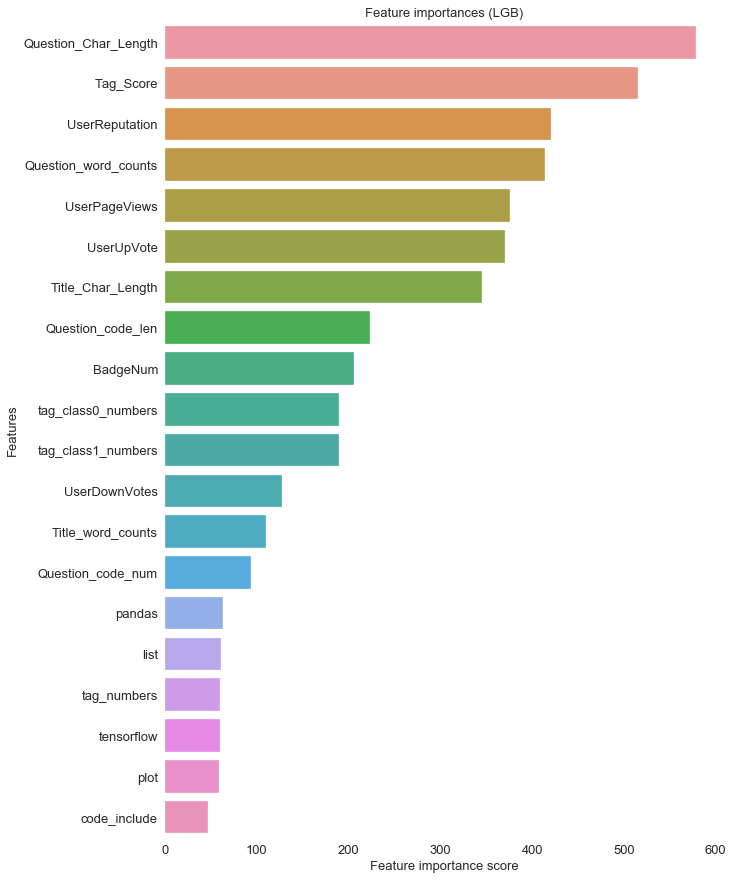

In [108]:
feature_scores = pd.Series(lgb_1.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)
f, ax = plt.subplots(figsize=(10, 15))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.tick_params(axis='y',labelsize=13)
ax.tick_params(axis='x',labelsize=13)
ax.set_title("Feature importances (LGB)", fontsize=13)
ax.set_yticklabels(feature_scores.index, fontsize=13)
ax.set_xlabel("Feature importance score", fontsize=13)
ax.set_ylabel("Features", fontsize=13)
plt.show()

In [60]:
import eli5
from eli5.sklearn import PermutationImportance

In [61]:
perm = PermutationImportance(lgb_1).fit(X_test_norm, y_test)
eli5.show_weights(perm, feature_names = X_test_norm.columns.tolist())

Weight,Feature
0.0967 ± 0.0027,tag_class1_numbers
0.0478 ± 0.0052,Question_Char_Length
0.0272 ± 0.0012,tag_class0_numbers
0.0058 ± 0.0011,Tag_Score
0.0055 ± 0.0013,pandas
0.0039 ± 0.0011,list
0.0037 ± 0.0006,code_include
0.0034 ± 0.0013,tensorflow
0.0031 ± 0.0006,plot
0.0025 ± 0.0010,Question_word_counts


## sparse matrix

In [33]:
from scipy.sparse import csr_matrix

In [45]:
sparse_dataset = csr_matrix(X_train_norm)

In [46]:
sparse_dataset

<152185x116 sparse matrix of type '<class 'numpy.float64'>'
	with 2750670 stored elements in Compressed Sparse Row format>

/Users/chenyiqiu/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Compression')

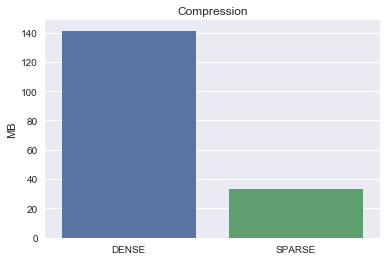

In [49]:
import seaborn as sns

dense_size = np.array(X_train).nbytes/1e6
sparse_size = (sparse_dataset.data.nbytes + sparse_dataset.indptr.nbytes + sparse_dataset.indices.nbytes)/1e6

sns.barplot(['DENSE', 'SPARSE'], [dense_size, sparse_size])
plt.ylabel('MB')
plt.title('Compression')

In [51]:
nb = LogisticRegression(max_iter=1000)
%timeit nb.fit(X_train_norm, y_train)
%timeit nb.fit(sparse_dataset, y_train)

9.12 s ± 817 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.97 s ± 183 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [50]:
nb = GaussianNB()
%timeit nb.fit(X_train_norm, y_train)
%timeit nb.fit(sparse_dataset.toarray(), y_train)

537 ms ± 27 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
515 ms ± 35.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
